<a href="https://colab.research.google.com/github/FarhanDwiPramana/PCVK/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gamma Correction

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


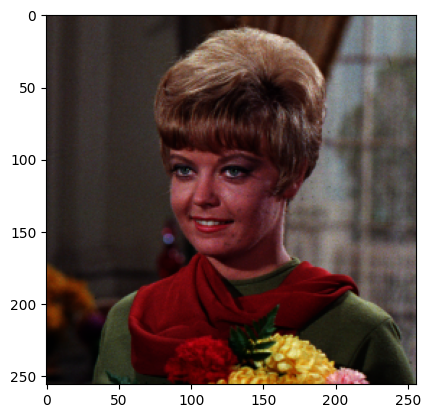

In [12]:
# Mengkonversikan Gambar (BGR -> RGB)
img = cv.imread('/content/drive/MyDrive/img/female.tiff')
konversi_img = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(konversi_img)

### TUGAS PRAKTIKUM

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


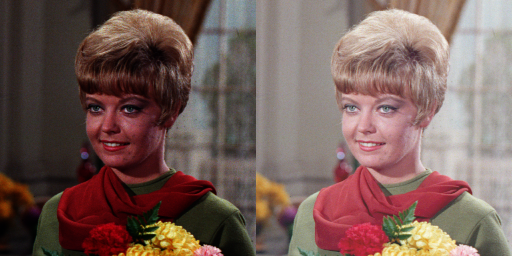

In [16]:
# 1. Buat Gamma Correction
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(konversi_img,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image)) # Menggabungkan Gambar (cv.hconcat)
cv2_imshow(final_frame)

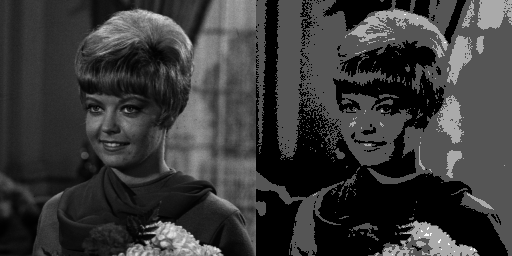

In [25]:
# 2. Buat Simulasi Image Depth
bit_depth=2 # nilai kedalaman
level = 255 / (pow(2,bit_depth)-1) # Rumus menentukan level kedalaman
original_depth = cv.imread('/content/drive/MyDrive/img/female.tiff', cv.IMREAD_GRAYSCALE)
depth_img = np.zeros(original_depth.shape, original_depth.dtype)

for y in range(original_depth.shape[0]):
  for x in range(original_depth.shape[1]):
    depth_img[y] = np.clip(np.round(original_depth[y]/level)*level, 0, 255) # Rumus Depth

final_frame = cv.hconcat((original_depth, depth_img)) # Menggabungkan Gambar (cv.hconcat)
cv2_imshow(final_frame)

Nilai PSNR untuk citra 5  adalah 27.53825727488449 (dB)


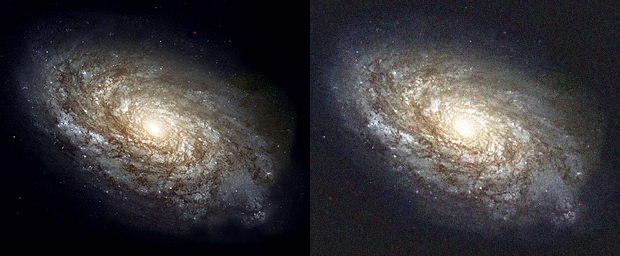

Nilai PSNR untuk citra 30  adalah 27.512168026040115 (dB)


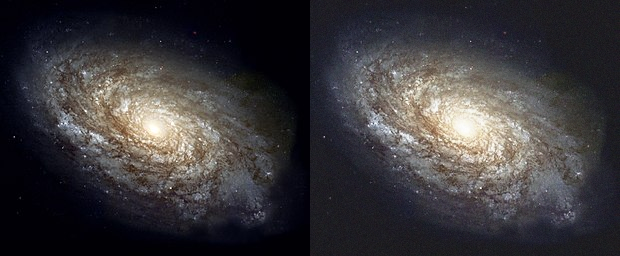

Nilai PSNR untuk citra 60  adalah 27.49858735840459 (dB)


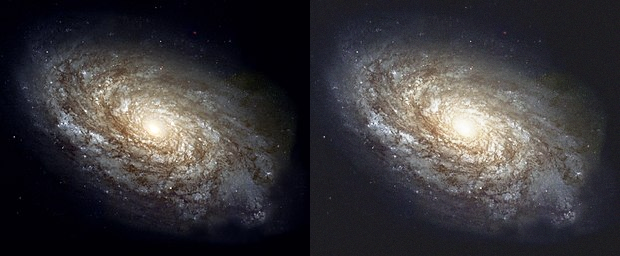

Nilai PSNR untuk citra 80  adalah 27.50487826684905 (dB)


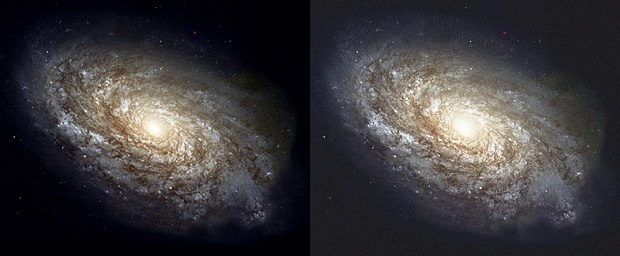

Nilai PSNR untuk citra 100  adalah 27.513678910570405 (dB)


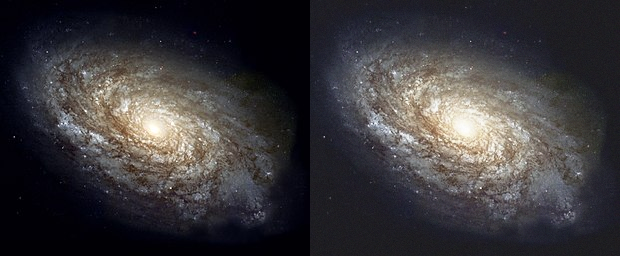

In [33]:
import glob
from math import log10, sqrt
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

original = cv.imread('/content/drive/MyDrive/img/galaxy.jpg')
cv_img = [] # Pembuatan Array
for img in glob.glob('/content/drive/MyDrive/img/noises/*.jpg'): # glob.glob -> untuk mendapatkan daftar file yang sesuai dengan pola
    n = cv.imread(img)
    cv_img.append(n) # Mengisi Array (Gambar keseluruhan noises)

def calculate_average_psnr(cv_img, noise_number):
    dst = cv_img[0] # Inisialisasi citra hasil penggabungan dengan citra pertama
    for i in range(noise_number):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1) # Hitung bobot alpha
            beta = 1.0 - alpha # Hitung bobot beta
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0) # Gabungkan citra dengan bobot alpha dan beta

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)  # Hitung Mean Squared Error (MSE)
        if mse == 0:
            return 100 # Handle kasus di mana MSE adalah 0
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse)) # Hitung nilai PSNR (Rumus PSNR)
        return psnr

    compressed = dst # Citra hasil penggabungan dianggap sebagai citra yang telah "dikompres"
    psnr = PSNR(original, compressed) # Hitung nilai PSNR antara citra asli dan citra hasil penggabungan

    print(f'Nilai PSNR untuk citra {noise_number}  adalah {psnr} (dB)')
    galaxy_frame = cv.hconcat((original, dst)) # Menggabungkan Gambar (cv.hconcat)
    cv2_imshow(galaxy_frame)

calculate_average_psnr(cv_img, 5)
calculate_average_psnr(cv_img, 30)
calculate_average_psnr(cv_img, 60)
calculate_average_psnr(cv_img, 80)
calculate_average_psnr(cv_img, 100)

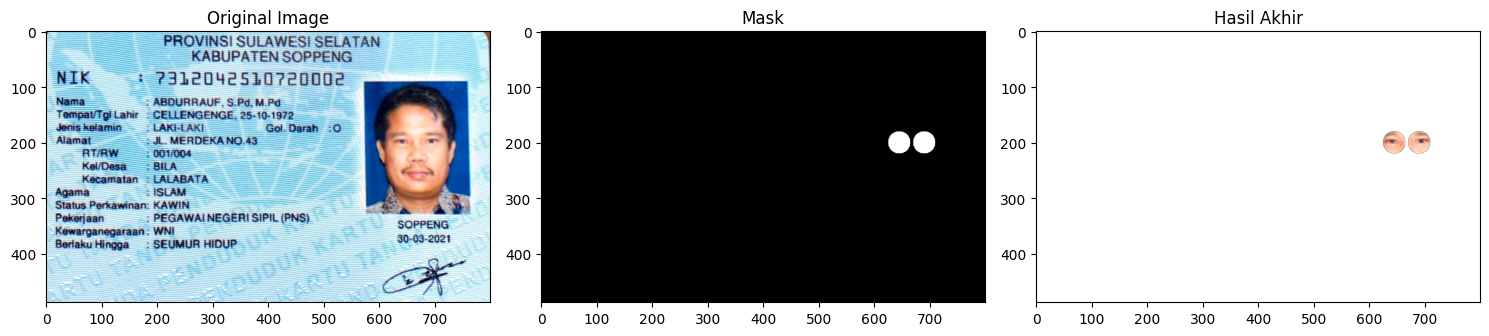

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/img/ktp.jpeg'
ktp = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (645, 200), 20, 255, -1)
cv.circle(mask, (690, 200), 20, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(ktp, ktp, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

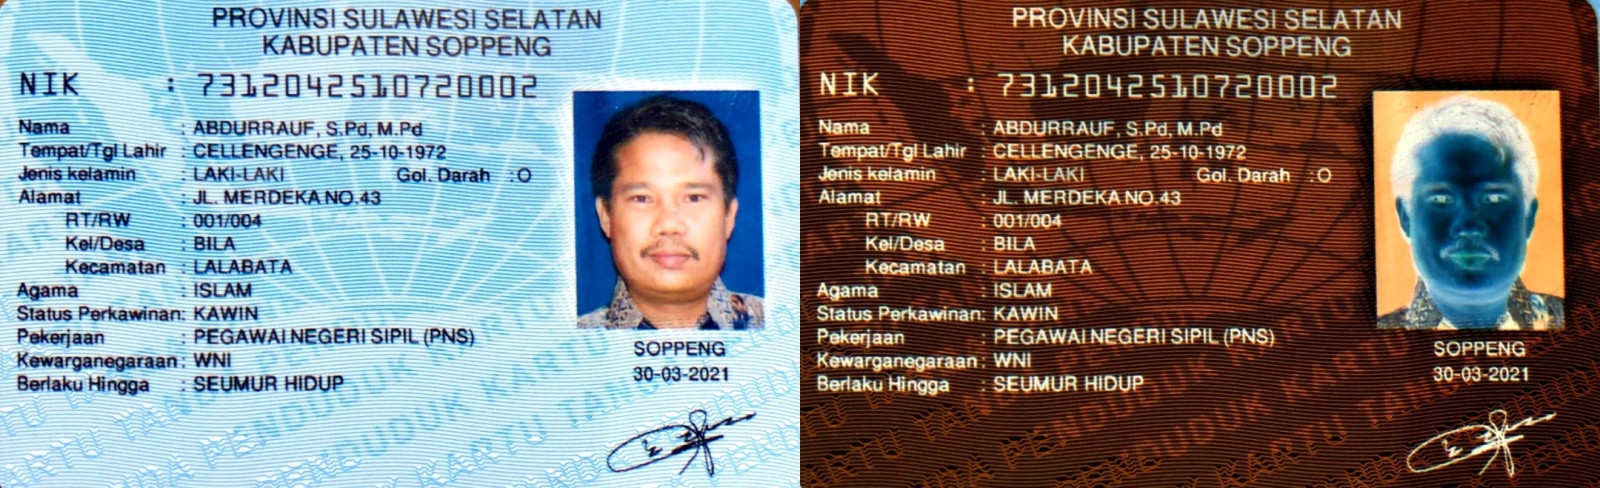

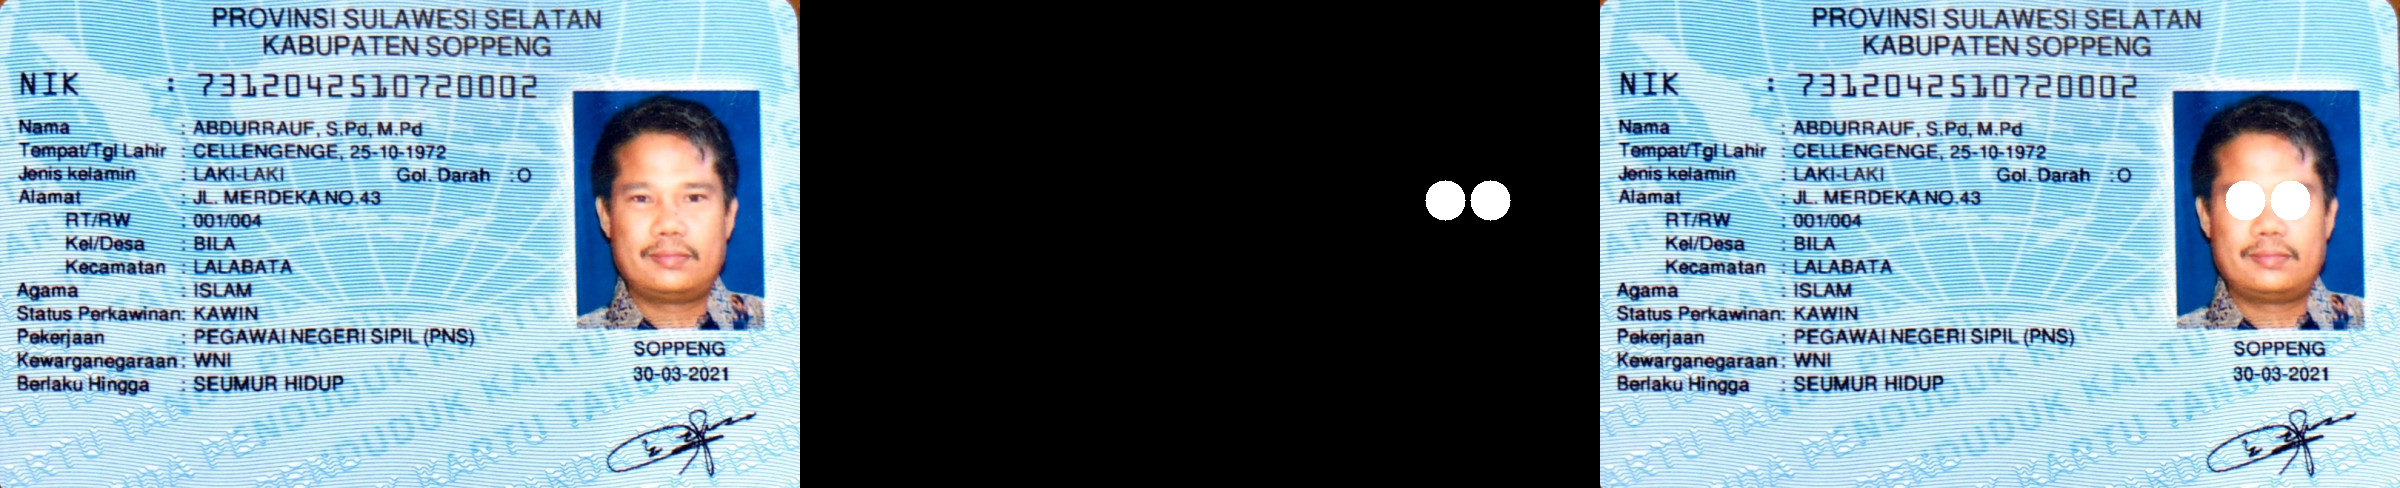

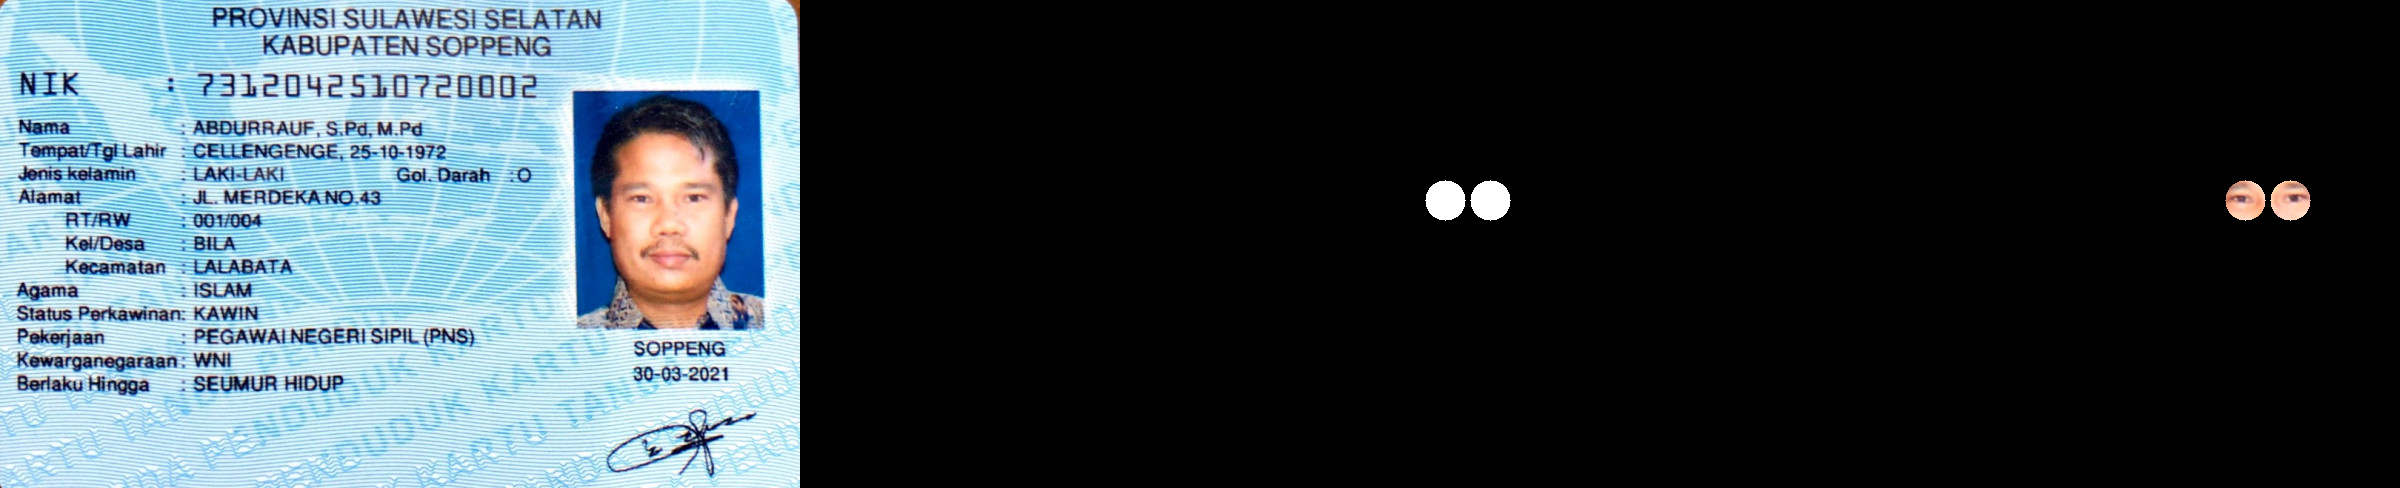

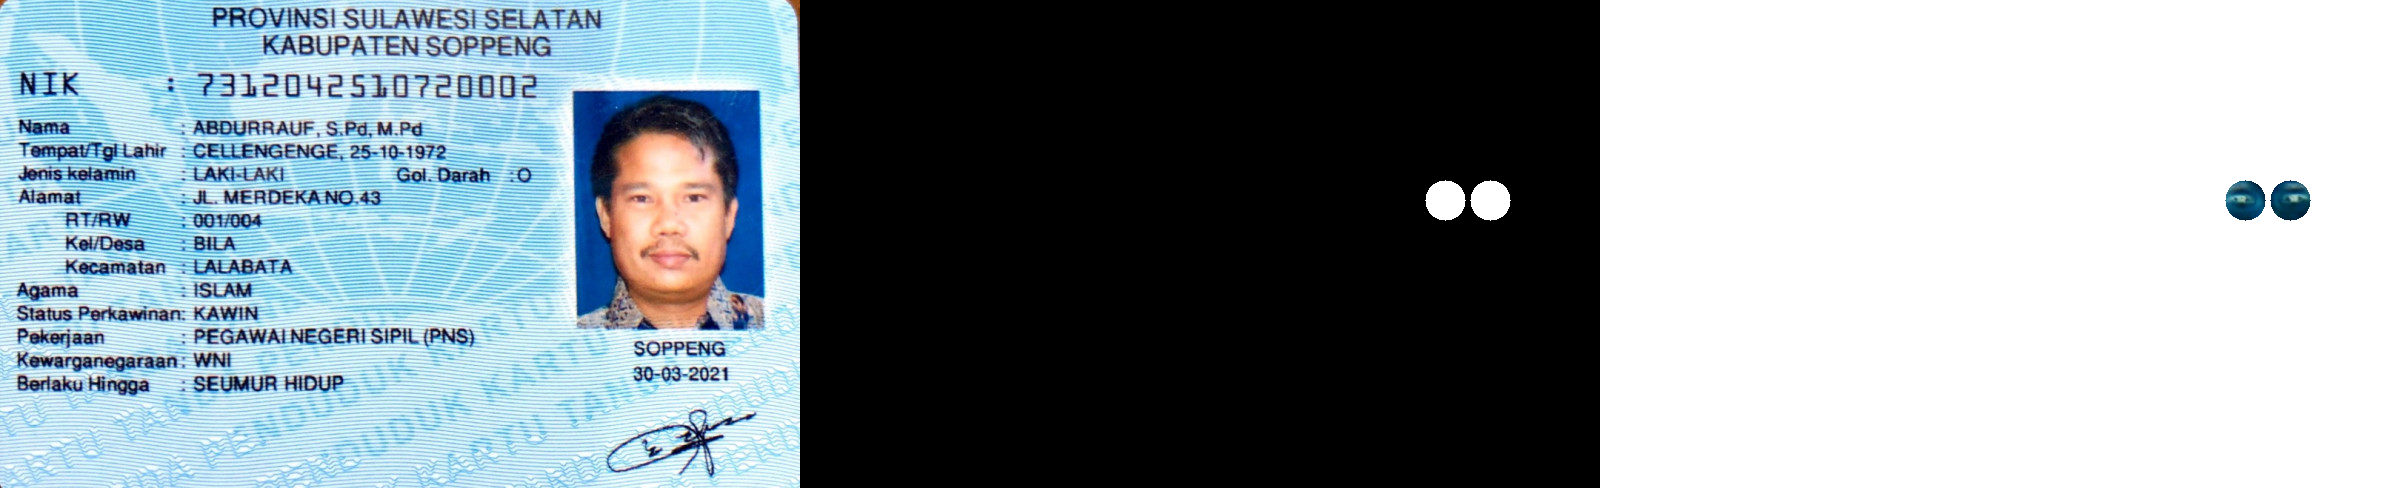

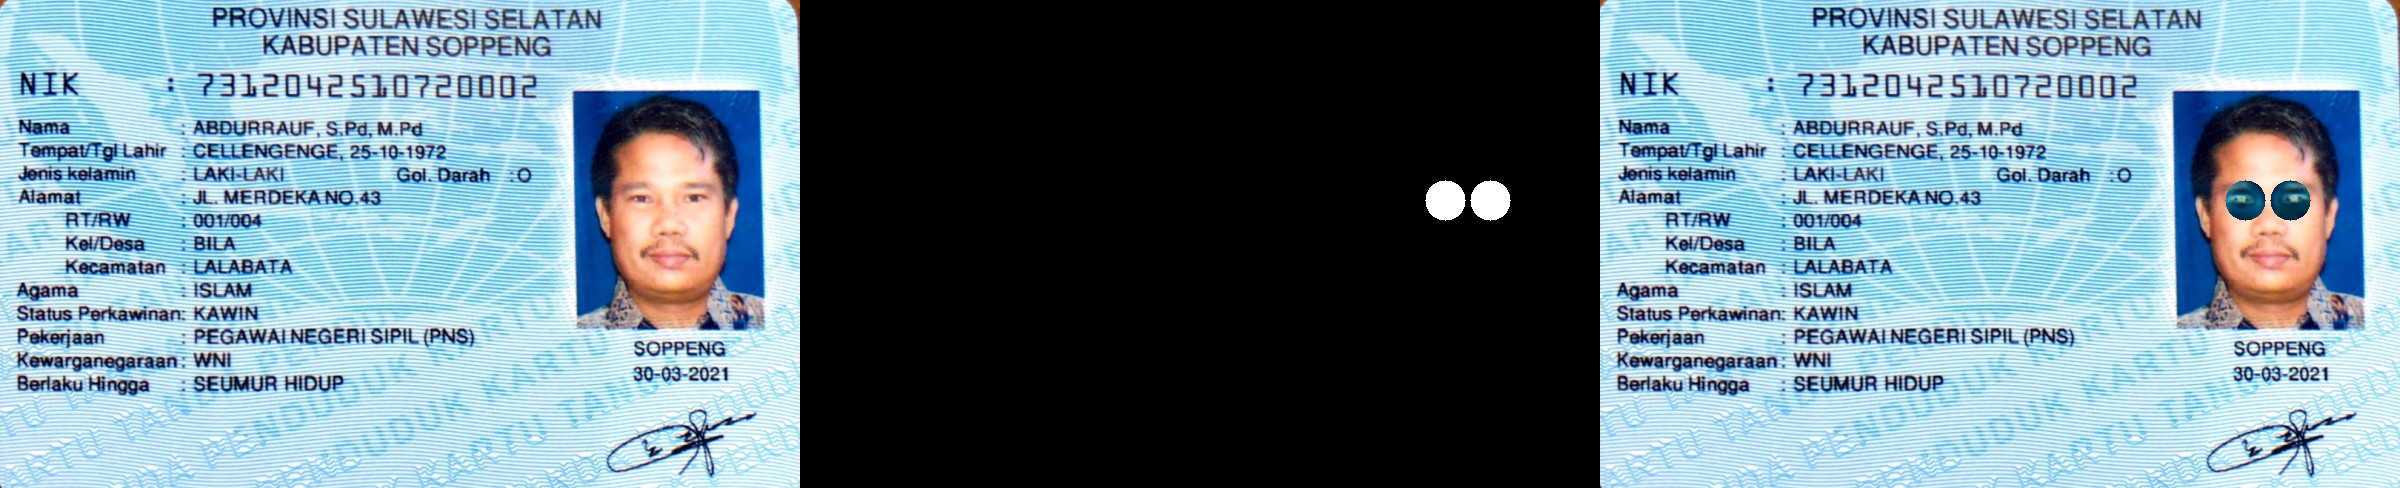

In [43]:
# NOT
inot = ~ktp
cv2_imshow(cv.hconcat((ktp, inot)))

# OR
ior = ktp | cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
cv2_imshow(cv.hconcat((ktp, cv.cvtColor(mask, cv.COLOR_GRAY2BGR),ior)))

# AND
iand = ktp & cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
cv2_imshow(cv.hconcat((ktp, cv.cvtColor(mask, cv.COLOR_GRAY2BGR),iand)))

#NAND
inand = ~(ktp & cv.cvtColor(mask, cv.COLOR_GRAY2BGR))
cv2_imshow(cv.hconcat((ktp, cv.cvtColor(mask, cv.COLOR_GRAY2BGR),inand)))

# XOR
ixor = ktp ^ cv.cvtColor(mask, cv.COLOR_GRAY2BGR)
cv2_imshow(cv.hconcat((ktp, cv.cvtColor(mask, cv.COLOR_GRAY2BGR),ixor)))